In [1]:
import os
import PIL
import PIL.Image
import pathlib
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [2]:
# funkce zmensi obrazky na scale % sve puvodni velikosti
def downscale_pics(pics, scale=30):
    resized = []
    for img in pics:
         
        width = int(img.shape[1] * scale / 100)
        height = int(img.shape[0] * scale / 100)
        dim = (width, height)

        resized.append(cv2.resize(img, dim, interpolation = cv2.INTER_AREA))
    
    return resized


In [3]:
def bgr_to_rgb(images):
    return [cv2.cvtColor(i, cv2.COLOR_BGR2RGB) for i in images ]

In [4]:
# nacte obrazky
def load_and_preprocess(path):
    
    # adresar s obrazy
    data_dir = pathlib.Path(path)

    # zobrazeni poctu obrazu v adresari
    image_count = len(list(data_dir.glob('*')))
    print(f"Celkem obrazů v adresáři {path}: {image_count}")


    paintings_path = list(data_dir.glob('*'))
    paintings_path = [str(path) for path in paintings_path]
    
    # ted pracuji pouze s sedymi obrazy
    paintings = [cv2.imread(painting_path) for painting_path in paintings_path]
    paintings = bgr_to_rgb(paintings)
    
    # Zmenseni obrazku ma na mem datasetu velmi pozitivni vliv!
    paintings = downscale_pics(paintings, scale=10)
    
    return paintings


In [11]:
stolen_art_dir_path = "./mydata-stolen/"
paintings = load_and_preprocess(stolen_art_dir_path)
paintings2 = paintings.copy()

Celkem obrazů v adresáři ./mydata-stolen/: 9


# Data Augmentation

## Imgaug

In [6]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa

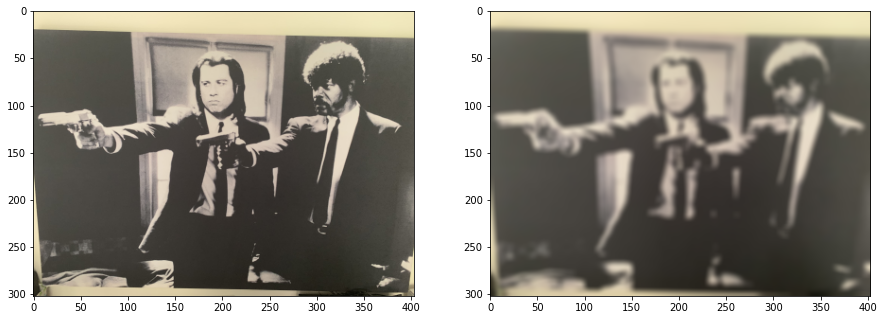

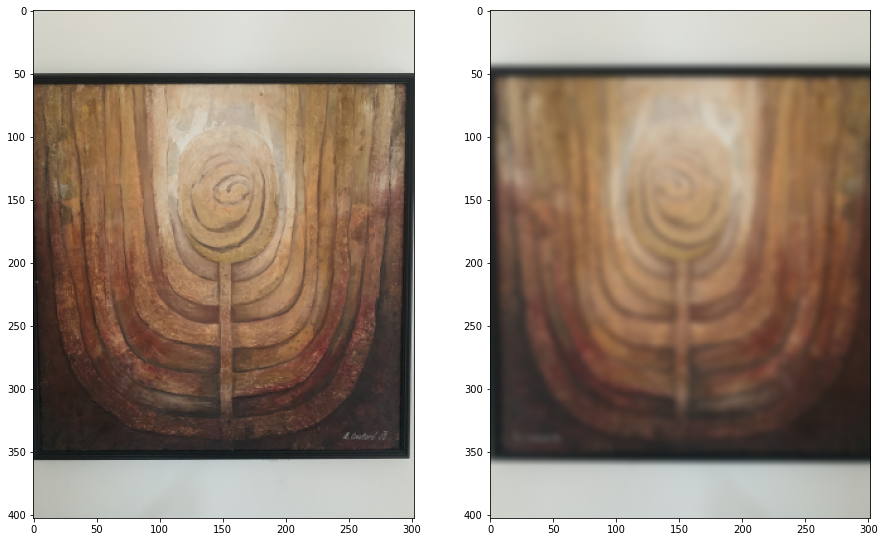

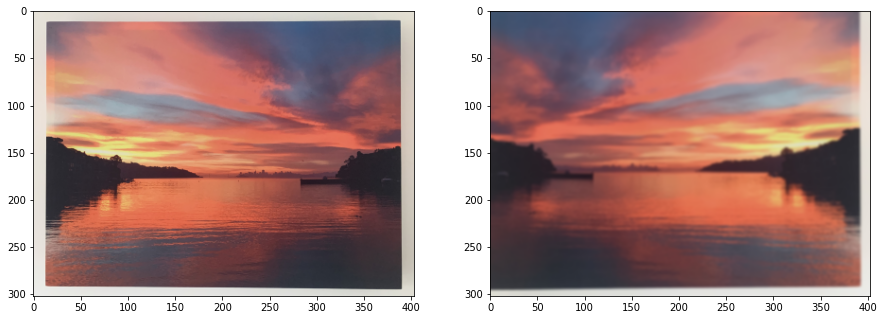

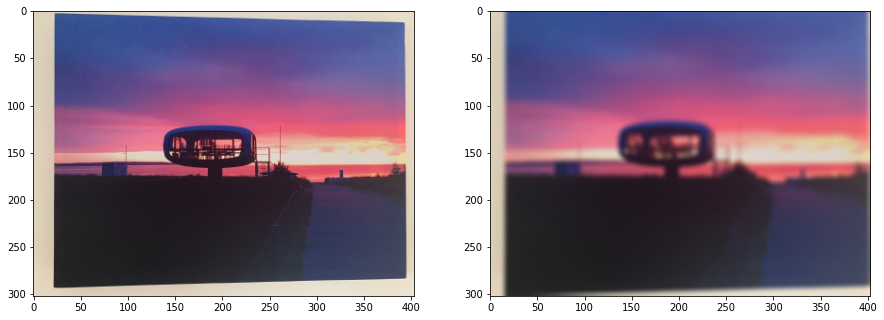

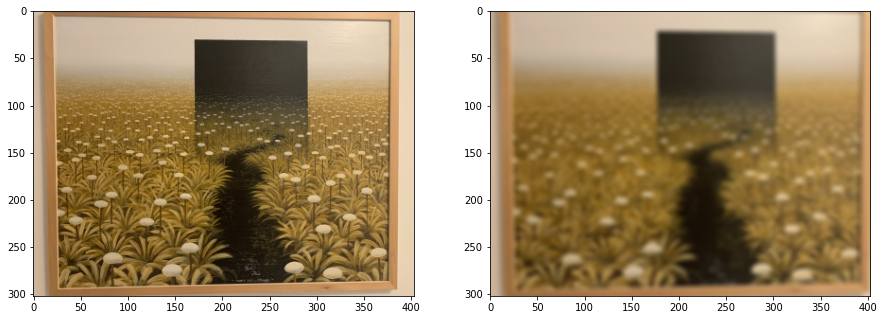

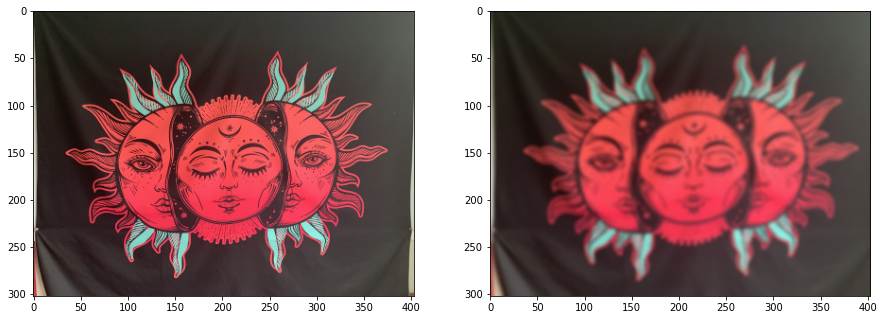

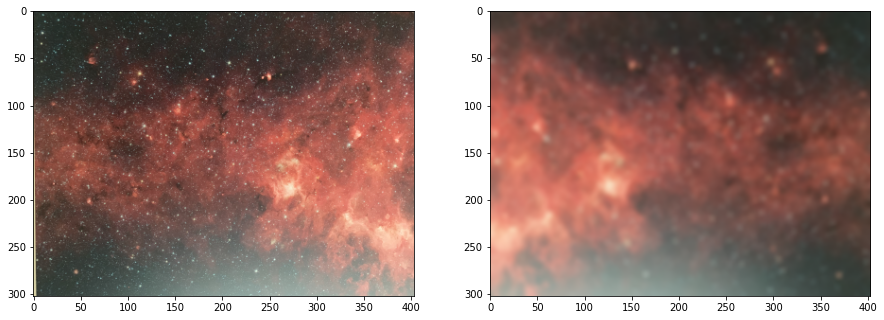

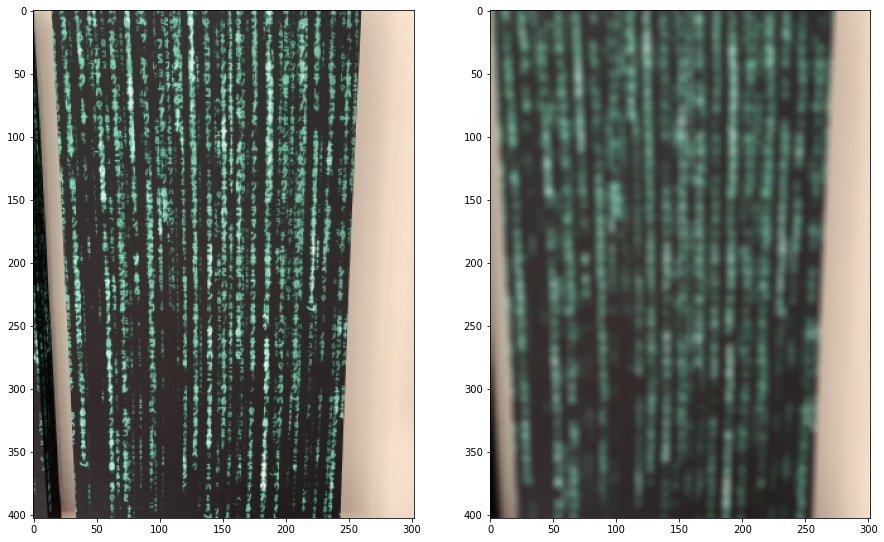

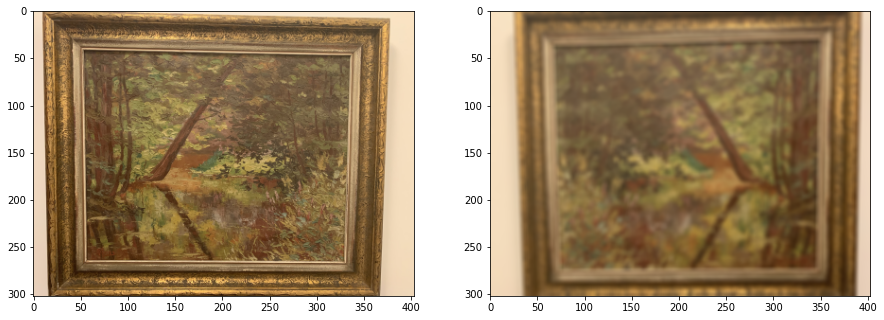

In [19]:

seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
])



for p in paintings:
    f, axarr = plt.subplots(1,2,figsize=(15,15))
    axarr[0].imshow(p)
    augmented = seq.augment_image(image=p)
    axarr[1].imshow(augmented)


## Keras

In [ ]:
paintings = paintings2

In [8]:
datagen = ImageDataGenerator()
gen = datagen.flow_from_directory(
    directory=stolen_art_dir_path,
    target_size=(256, 256),
    color_mode="rgb",
    classes=None,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)

Found 0 images belonging to 0 classes.


In [9]:
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array

paintings = [np.array(p) for p in paintings]
paintings = [p.reshape(p.shape + (1,)) for p in paintings]
paintings = np.array(paintings)
print(paintings.shape)



painting0 = paintings[0]
painting0 = painting0.reshape((1,) + painting0.shape)
print(painting0.shape)

datagen = ImageDataGenerator(rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


(9,)
(1, 302, 403, 3, 1)


In [10]:
i = 0
for batch in datagen.flow(painting0, batch_size=1,
                          save_to_dir='kerasaug', save_format='jpeg'):
    i += 1
    if i > 20:
        break 

ValueError: ('Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape', (1, 302, 403, 3, 1))